## Spam Mail Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [2]:
data = pd.read_csv("spam.csv")
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.shape

(5572, 2)

In [4]:
data.columns = ['labels','messages']
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data["b_labels"] = data['labels'].map({'ham': 0,'spam': 1})
data.head()

,labels,messages,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
#ip op
X = data.messages
Y = data['b_labels'].values

In [7]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: messages, Length: 5572, dtype: object

In [8]:
Y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.33,random_state=3)

In [10]:
#vectorize
tfidf = TfidfVectorizer()
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)

In [11]:
y_train

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [12]:
print(x_train)

  (0, 6116)	0.2609355416663505
  (0, 6122)	0.11418039588225035
  (0, 6200)	0.18101661854886608
  (0, 6658)	0.16091303025900144
  (0, 6515)	0.21897213912364002
  (0, 5739)	0.3039668967934368
  (0, 357)	0.3456892908898915
  (0, 3380)	0.182519880171032
  (0, 1218)	0.3239598533513099
  (0, 4055)	0.36293691577557396
  (0, 6460)	0.16456411731762358
  (0, 4212)	0.135685358615095
  (0, 1072)	0.2609355416663505
  (0, 870)	0.12455626372769148
  (0, 823)	0.17272289491431062
  (0, 6622)	0.1891281580763196
  (0, 3363)	0.1272233288148338
  (0, 6887)	0.3456892908898915
  (1, 6122)	0.09034297284170562
  (1, 3363)	0.10066293474584673
  (1, 5931)	0.25019036399475025
  (1, 4971)	0.23299737766601056
  (1, 6796)	0.24500207584409536
  (1, 6759)	0.18550743467884476
  (1, 6274)	0.2151378893363213
  :	:
  (3731, 835)	0.23307379658313504
  (3731, 4169)	0.22631723402819862
  (3731, 3616)	0.27928590806126186
  (3731, 4409)	0.27366315657679824
  (3731, 6646)	0.27366315657679824
  (3731, 5269)	0.3091229628646678
  

In [13]:
print(x_test)

  (0, 1)	0.22327854203640024
  (0, 7)	0.26496022318519885
  (0, 12)	0.25197760866008617
  (0, 18)	0.28532968333483233
  (0, 280)	0.22861476322552407
  (0, 371)	0.22166054192670345
  (0, 982)	0.26496022318519885
  (0, 1019)	0.23266326612847796
  (0, 1276)	0.23721908050607146
  (0, 1316)	0.29580102570383415
  (0, 1441)	0.12194776732998026
  (0, 1449)	0.245341284657801
  (0, 3363)	0.10886305173066742
  (0, 4098)	0.1736555966731067
  (0, 4321)	0.13816662350245962
  (0, 4438)	0.1257146865017425
  (0, 4872)	0.18862636454849274
  (0, 5020)	0.22497182450816752
  (0, 6122)	0.09770241400968756
  (0, 6158)	0.14168374457264082
  (0, 6231)	0.08071970596378764
  (0, 6463)	0.19339566346232354
  (0, 6811)	0.1811484074644196
  (0, 6932)	0.08296139800856572
  (0, 6938)	0.11890866984206064
  :	:
  (1837, 2413)	0.30377558821370393
  (1837, 2711)	0.1416398240109084
  (1837, 2953)	0.2502245713655603
  (1837, 3150)	0.27115206729279917
  (1837, 3930)	0.30377558821370393
  (1837, 4204)	0.21840117169169965
  (1

In [14]:
#Model
algo = MultinomialNB()
algo.fit(x_train,y_train)

MultinomialNB()

In [15]:
print("Train score : ",algo.score(x_train,y_train))
print("Test score : ",algo.score(x_test,y_test))

Train score :  0.9697294401285829
Test score :  0.9516041326808048


In [16]:
pred = algo.predict(x_test)
pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
ac = accuracy_score(pred,y_test)
re = recall_score(pred,y_test)
pr = precision_score(pred,y_test)
f1 = f1_score(pred,y_test)
print("Accuracy : ",ac)
print('Recall : ' ,re)
print('Precision' ,pr)
print('F1 Score : ',f1)


Accuracy :  0.9516041326808048
Recall :  1.0
Precision 0.6482213438735178
F1 Score :  0.7865707434052758


### Word Cloud
<pre>It is a visualization technique for text data wherein each word is picturize
d with its importance in the context or its frequency

For Example:</pre>

<img src="https://resilienteducator.com/wp-content/uploads/2015/09/Revising-With-Pictures-How-Word-Clouds-Help-Students-Become-Better-Writers.jpg" height=1000 width=800>

In [18]:
#Visualise the data
def visualize(n):
    words = ''
    for i in data[data.labels==n]['messages']:
    
        i.lower()
        words += i
    
    wc = WordCloud(width=600,height=400).generate(words)
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

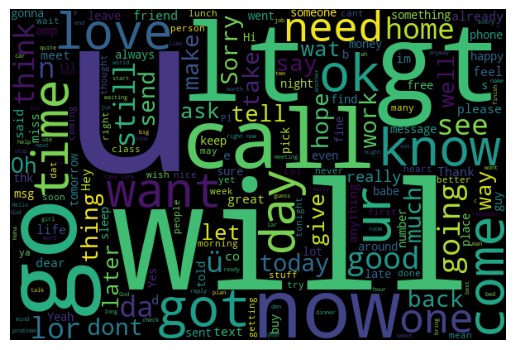

In [19]:
visualize('ham')

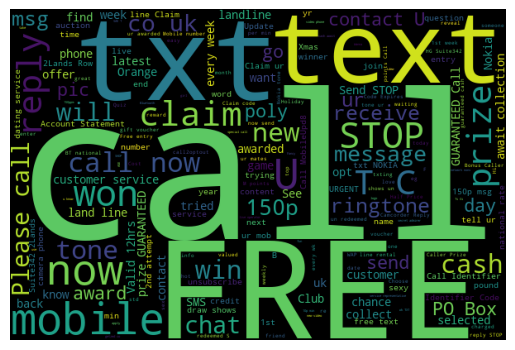

In [20]:
visualize('spam')
